In [ ]:
!pip install findspark 
!wget 'https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt'

--2021-11-29 12:34:18--  https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt
Resolving ocw.mit.edu (ocw.mit.edu)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to ocw.mit.edu (ocw.mit.edu)|151.101.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5458199 (5.2M) [text/plain]
Saving to: ‘t8.shakespeare.txt’

t8.shakespeare.txt  100%[===================>]   5.21M  --.-KB/s    in 0.03s   

2021-11-29 12:34:18 (171 MB/s) - ‘t8.shakespeare.txt’ saved [5458199/5458199]



In [ ]:
!pip install pyspark 

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 15.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=19159685f1c2bea79485758448753c0f5c57b84670820ea6dbfb845ca4634e03
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
import pyspark 
import findspark

Run local spark session

In [ ]:
sc = pyspark.SparkContext.getOrCreate()

In [ ]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

Creation d'un RDD 

In [ ]:
big_list = range(10000)

In [ ]:
rdd = sc.parallelize(big_list,2) 

In [ ]:
rdd

PythonRDD[1] at RDD at PythonRDD.scala:53

Tansformation

In [ ]:
rdd_t1 = rdd.filter(lambda x: x % 2 != 0)

In [ ]:
rdd_t1

PythonRDD[2] at RDD at PythonRDD.scala:53

Action

In [ ]:
rdd_t1.first()

1

In [ ]:
rdd_t1.cache()

PythonRDD[2] at RDD at PythonRDD.scala:53

In [ ]:
rdd_t1.count()

5000

In [ ]:
rdd_t1.take(5)

[1, 3, 5, 7, 9]

Un autre dataset 

In [ ]:
!wget 'https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt'

--2021-11-29 12:35:18--  https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt
Resolving ocw.mit.edu (ocw.mit.edu)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to ocw.mit.edu (ocw.mit.edu)|151.101.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5458199 (5.2M) [text/plain]
Saving to: ‘t8.shakespeare.txt.1’

t8.shakespeare.txt. 100%[===================>]   5.21M  --.-KB/s    in 0.03s   

2021-11-29 12:35:18 (176 MB/s) - ‘t8.shakespeare.txt.1’ saved [5458199/5458199]



In [ ]:
distfile = sc.textFile("/content/t8.shakespeare.txt") 

Actions 

In [ ]:
distfile.first()

'This is the 100th Etext file presented by Project Gutenberg, and'

In [ ]:
distfile.take(5)

['This is the 100th Etext file presented by Project Gutenberg, and',
 'is presented in cooperation with World Library, Inc., from their',
 'Library of the Future and Shakespeare CDROMS.  Project Gutenberg',
 'often releases Etexts that are NOT placed in the Public Domain!!',
 '']

In [ ]:
distfile.count()

124456

Transformation

In [ ]:
rdd_t2_dataset = distfile.filter(lambda line: 'close' in line.lower())

In [ ]:
rdd_t2_dataset

PythonRDD[11] at RDD at PythonRDD.scala:53

Action 

In [ ]:
rdd_t2_dataset.count()

166

In [ ]:
wordCounts = distfile.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)

In [ ]:
wordCounts

PythonRDD[17] at RDD at PythonRDD.scala:53

In [ ]:
wordCounts.collect()

[('is', 7851),
 ('Etext', 4),
 ('presented', 11),
 ('Project', 13),
 ('Gutenberg,', 1),
 ('in', 9576),
 ('cooperation', 1),
 ('World', 5),
 ('Library,', 2),
 ('Inc.,', 1),
 ('of', 15544),
 ('Future', 3),
 ('Shakespeare', 45),
 ('are', 2917),
 ('placed', 10),
 ('Public', 1),
 ('Domain!!', 1),
 ('*This', 1),
 ('certain', 116),
 ('copyright', 7),
 ('implications', 1),
 ('read!*', 1),
 ('ELECTRONIC', 442),
 ('VERSION', 221),
 ('OF', 1490),
 ('WILLIAM', 244),
 ('SHAKESPEARE', 223),
 ('IS', 445),
 ('COPYRIGHT', 221),
 ('WORLD', 221),
 ('LIBRARY,', 221),
 ('PROVIDED', 222),
 ('GUTENBERG', 221),
 ('ETEXT', 223),
 ('COLLEGE', 221),
 ('PERMISSION.', 221),
 ('READABLE', 221),
 ('MAY', 223),
 ('BE', 222),
 ('LONG', 221),
 ('AS', 223),
 ('ARE', 446),
 ('FOR', 669),
 ('YOUR', 221),
 ('OTHERS', 233),
 ('USE', 221),
 ('(2)', 222),
 ('THAT', 222),
 ('CHARGES', 223),
 ('TIME', 221),
 ('MEMBERSHIP.>>', 220),
 ('The', 3965),
 ('presentation', 3),
 ('THIS', 6),
 ('NEITHER', 1),
 ('SHAREWARE', 1),
 ('PUBLIC

In [ ]:
wordCounts.first()

('is', 7851)

Partie II 

In [ ]:
rdd = sc.textFile("/content/sample_data/blogtexts") 

map et flatmap 

In [ ]:
rdd.take(5)

Py4JJavaError: ignored

In [ ]:
def Func(lines):
      lines = lines.lower()
      lines = lines.split()
      return lines

In [ ]:
rdd2 = rdd.map(Func)

In [ ]:
rdd3 = rdd.flatMap(Func)

Action

In [ ]:
rdd3.take(3)

In [ ]:
rdd3.take(5)

Transformation 2 : Filter 

In [ ]:
stopwords = ['is','am','are','the','for','a']

In [ ]:
rdd4 = rdd.filter(lambda x: x not in stopwords)

In [ ]:
rdd4

Action

In [ ]:
rdd4.take(1)

Transformation 3 : groupBy

In [ ]:
rdd5 = rdd3.groupBy(lambda w: w[0:3])

In [ ]:
for (k, v) in rdd5.take(12): print (k, list(v))

groupByKey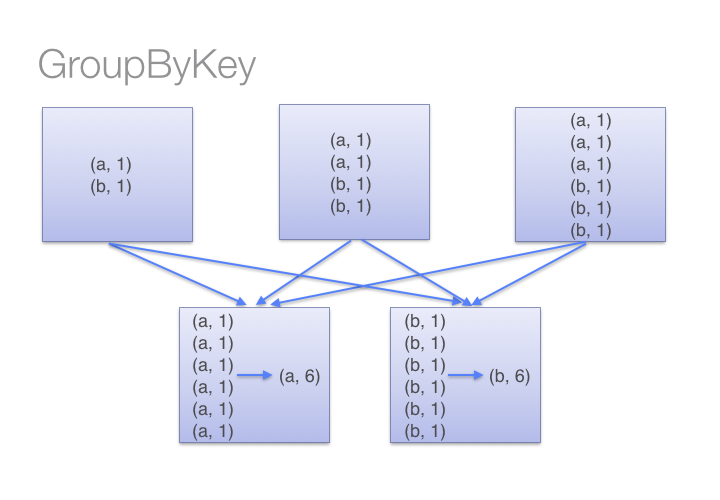

In [ ]:
rdd3_mapped = rdd3.map(lambda x: (x,1))
rdd3_grouped = rdd3_mapped.groupByKey()

In [ ]:
print(list((j[0], list(j[1])) for j in rdd3_grouped.take(5)))

reducedByKey

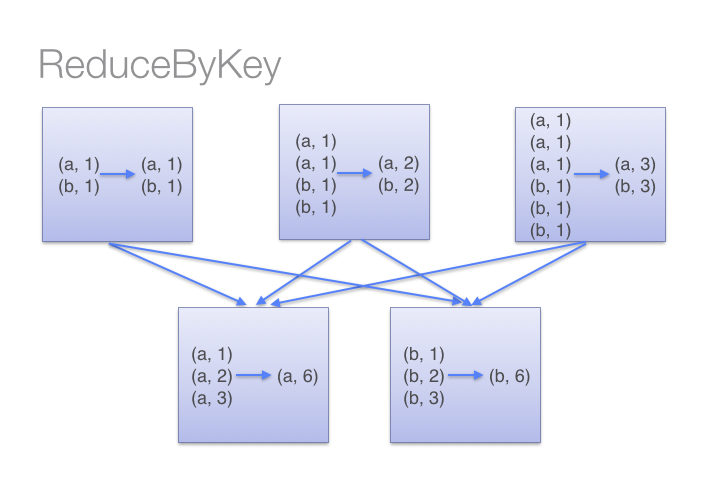

In [ ]:
rdd3_mapped.reduceByKey(lambda x,y: x+y).map(lambda x:(x[1],x[0])).sortByKey(False).take(10)